# Fundamental Diagramms regarding Measurement Lines

In this Guide will showcase how it is possible to calculate speed, flow and density when analysing pedestrian trajectories at a measurement line.

The Voronoi decomposition can be used to determine fields in which velocity, flow and density can be measured at a specific point. With these calculations it is also possible to compute measurement values at a measurement line.

the proportion of the voronoi cell on the line determines the proportion of the pedestrian's measured values in the result.

$$ v_{l0} = \sum_i v_{i,n_{l0}} * w_{i,l0}  $$
this is an example of a simplified speed calculation. It can be seen that the speed at the measurement line ($v_{l0}$) is calculated from the speed of agent $i$ orthogonal to the measurement line ($v_{i,n_{l0}}$) and his proportion of the line ($w_{i,l0}$). The density and flow can be calculated in a similar way. How exactly the measured values are determined will be explained in the following guide.

# Setup Files

First, the trajectories need to be loaded. In this guide, data from four experiments are analyzed. Two of the experiments have a unidirectional main movement direction. The other two have a bidirectional main movement direction. The main movement direction is aligned so that it is orthogonal to the measurement line. This will later also be illustrated in a plot. 

The files dictionary consists of a key name that will be used later on for the trajectory, the path to the data and an additional Unit if it is not given in the trajectory data.

In [1]:
from pedpy import TrajectoryUnit
files = {"unidirectional 1": ("demo-data/uni-directional/traj_UNI_CORR_500_08.txt", TrajectoryUnit.METER),
         "unidirectional 2": ("demo-data/uni-directional/traj_UNI_CORR_500_03.txt", TrajectoryUnit.METER),
         "bidirectional 1": ("demo-data/bi-directional/bi_corr_400_b_08.txt", None),
         "bidirectional 2": ("demo-data/bi-directional/bi_corr_400_b_03.txt", None)}

## load trajectories

In [2]:
from pedpy import load_trajectory
import pathlib

trajectories = {}
for name, (path, unit) in files.items():
    trajectories[name] = load_trajectory(
        trajectory_file=pathlib.Path(path),
        default_unit=unit)
    

## Define Geometries and Measurement lines

In order to determine the Voronoi polygons and plot the trajectories in a later step, the {class}`walkable area <geometry.WalkableArea>` of the experiment must first be defined.

In [18]:
from pedpy import WalkableArea

walkable_areas = {
    "unidirectional 1": WalkableArea(
        # complete area
        [
            (-6.5, 6.5), 
            (-6.5, -1.5), 
            (6.5, -1.5), 
            (6.5, 6.5)
        ],
        obstacles=[
            # untere Wand:
            [
                (-6.0, 0.0), 
                (5.0, 0.0), 
                (5.0, -1.0), 
                (-6.0, -1.0)
            ],
            # obere Wand:
            [
                (-6.0, 5.0), 
                (5.0, 5.0), 
                (5.0, 6.0), 
                (-6.0, 6.0)
            ],
        ]    
    ),
    "unidirectional 2": WalkableArea(
        # complete area
        [
            (-6.5, 6.5), 
            (-6.5, -1.5), 
            (6.5, -1.5), 
            (6.5, 6.5)
        ],
        obstacles=[
            # untere Wand:
            [
                (-6.0, 0.0), 
                (5.0, 0.0), 
                (5.0, -1.0), 
                (-6.0, -1.0)
            ],
            # obere Wand:
            [
                (-6.0, 5.0), 
                (5.0, 5.0), 
                (5.0, 6.0), 
                (-6.0, 6.0)
            ],
        ]    
    ),
    "bidirectional 1": WalkableArea(
        # complete area
        [
            (-6.5, 6.5), 
            (-6.5, -1.5), 
            (5.5, -1.5), 
            (5.5, 6.5)
        ],
        obstacles=[
            # untere Wand:
            [
                (-6.0, 0.0), 
                (5.0, 0.0), 
                (5.0, -1.0), 
                (-6.0, -1.0)
            ],
            # obere Wand:
            [
                (-6.0, 4.0), 
                (5.0, 4.0), 
                (5.0, 5.0), 
                (-6.0, 5.0)
            ],
        ]    
    ),
    "bidirectional 2": WalkableArea(
        # complete area
        [
            (-6.5, 6.5), 
            (-6.5, -1.5), 
            (5.5, -1.5), 
            (5.5, 6.5)
        ],
        obstacles=[
            # untere Wand:
            [
                (-5.0, 0.0), 
                (5.0, 0.0), 
                (5.0, -1.0), 
                (-5.0, -1.0)
            ],
            # obere Wand:
            [
                (-5.0, 4.0), 
                (5.0, 4.0), 
                (5.0, 5.0), 
                (-5.0, 5.0)
            ],
        ]    
    )
}

the {class}`measurement line <geometry.MeasurementLine>` defines where to measure characteristics of the experimental data. In order to receive correct results it is important, that the measurement line is placed orthogonal to the main movement direction. There should not be any pedestrians within the proximity of the line that walk parallel to it.  

In [19]:
from pedpy import MeasurementLine
measurement_lines = {
    "unidirectional 1": MeasurementLine([(0.0, 0.0), (0.0, 5.0)]),
    "unidirectional 2": MeasurementLine([(0.0, 0.0), (0.0, 5.0)]),
    "bidirectional 1": MeasurementLine([(0.0, 0.0), (0.0, 4.0)]),
    "bidirectional 2": MeasurementLine([(0.0, 0.0), (0.0, 4.0)])
}

## Plot trajectories, geometry, and measurement lines

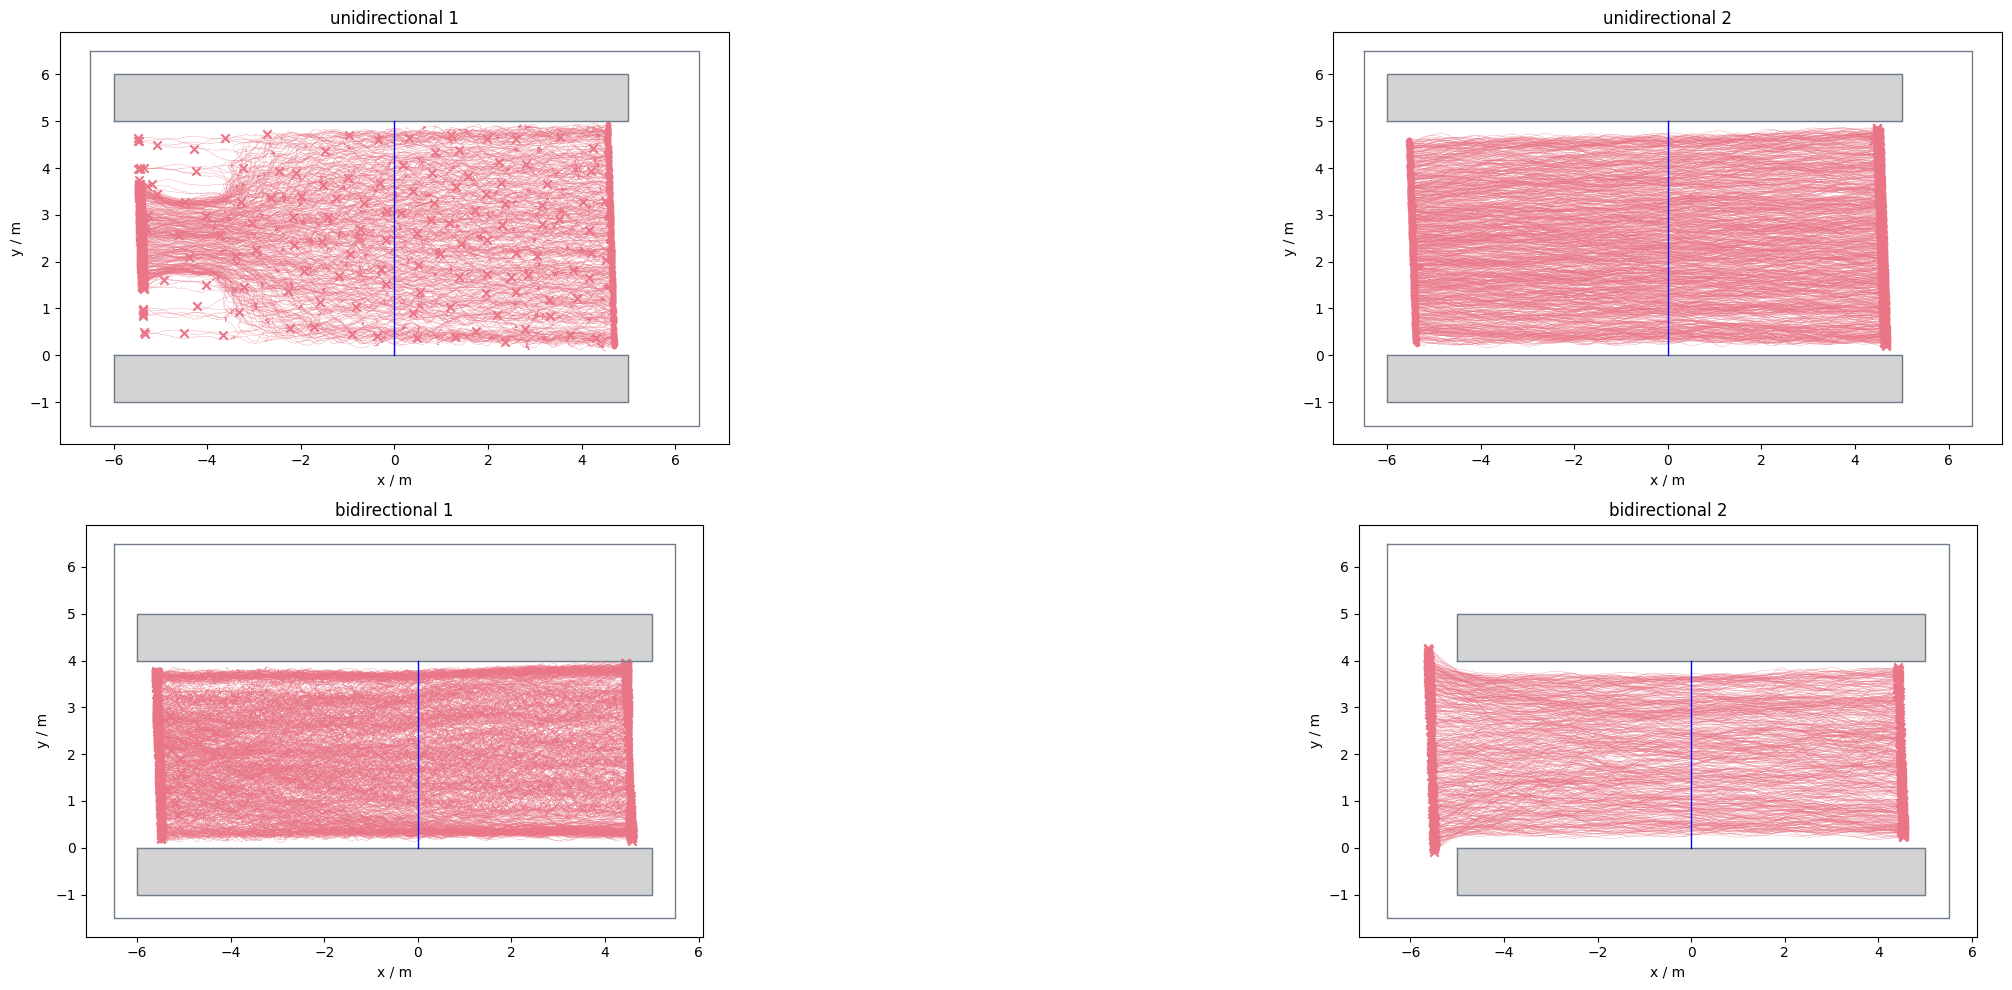

In [20]:
import matplotlib.pyplot as plt
from pedpy import plot_measurement_setup

fig, axs = plt.subplots(2, int(len(trajectories)/2), figsize=(30, 10))

for (name, trajectory), ax in zip(trajectories.items(), axs.ravel()):
    ax.set_title(name)

    ax = plot_measurement_setup(
        traj=trajectory,
        walkable_area=walkable_areas[name],
        measurement_lines=[measurement_lines[name]],
        axes=ax,
        traj_width=0.2,
        traj_start_marker=".",
        traj_end_marker="x",
        ma_color="g",
        ma_line_color="g",
        ma_alpha=0.2,
        ml_color="b",
    )
    ax.set_aspect("equal")

fig.tight_layout()
plt.show()

In [21]:
from pedpy import is_trajectory_valid
is_trajectory_valid(traj_data=trajectories['bidirectional 2'], walkable_area=walkable_areas['bidirectional 2'])

True

## Calculate Voronoi Polygons

The Voronoi decomposition will be used to create a scalar field to measure velocity, speed and density. It is highly recommended to use a Cutoff when calculating the Voronoi polygons, as the resulting data may be inaccurate if individual pedestrians at the edge of a group have an impact on large areas, even if they are very far away.

Note that the calculation of the Voronoi Polygons will take a while

In [6]:
from pedpy.methods.method_utils import compute_individual_voronoi_polygons, Cutoff

individual_cutoffs = {}

for name in trajectories:
    individual_cutoffs[name] = compute_individual_voronoi_polygons(
        traj_data=trajectories[name],
        walkable_area=walkable_areas[name],
        cut_off=Cutoff(radius=0.8, quad_segments=3)
    )

## choosing the correct speed calculation and determine the individual Speed

When calculating the individual velocity, make sure that the "compute velocity" option is used. The choice of the frame step is also important. The frame step determines how many frames before and after the current position are used for the calculation of the movement. If too many frames are selected, smaller movements against the main direction of movement may no longer be included in the overall image. The value for the individual speed of some frames could then be positive, even if it should actually be negative.

When calculating the individual Speed it might be necessary to specify the speed calculation for border cases. Usually it is fine to use BORDER_EXCLUDE. However, if a pedestrians Voronoi Cell reaches the measurement line on a frame lower than the frame-step or higher than the last frame of the trajectory minus the frame-step there will be no individual speed provided. You should pay attention to this especially when using no Cutoff to compute the Voronoi decomposition. When calculating the Line Speed with insufficient speed data there will be an error message and no proper result. There are multiple ways to solve this Problem. 

It is possible to cut a few frames from the trajectory data used to determine the Voronoi Polygons. If there are more frames at the beginning and end of the data used for the individual speed calculation than in the Voronoi decomposition, it is possible to solve the Problem while keeping the same speed calculation.

You could also consider using a different Speed Calculation: 
if a pedestrians Voronoi Cell crosses the line on the first or last Frame like in the first unidirectional example it is possible to calculate the Speed using the BORDER_SINGLE_SIDED speed calculation.
if a pedestrians Voronoi Cell crosses the line on another Frame too early or too late but not the first or last frame you can solve the Problem by using the BORDER_ADAPTIVE speed calculation.


In [7]:
from pedpy.methods.speed_calculator import compute_individual_speed, SpeedCalculation
calculation_methods = {
    "unidirectional 1": SpeedCalculation.BORDER_SINGLE_SIDED,
    "unidirectional 2": SpeedCalculation.BORDER_EXCLUDE,
    "bidirectional 1": SpeedCalculation.BORDER_EXCLUDE,
    "bidirectional 2": SpeedCalculation.BORDER_EXCLUDE,
}

individual_speeds = {}

for name in trajectories:
    individual_speeds[name] = compute_individual_speed(
        traj_data=trajectories[name],
        frame_step=1,
        compute_velocity=True,
        speed_calculation=calculation_methods[name]
    )

## determine the Species for each agent

the species of the pedestrian decides from which side they encounter the measurement line. Accordingly, there are two possible main directions of movement orthogonal to the line. Here they are later referred to as Species 1 and 2. 

The decision which species represents a pedestrian is made by analyzing the first frame in which its Voronoi cell touches the line. The sign of the orthogonal velocity to the line $n * v(t_{i,l0})$ is defined as the movement factor $m$ of a pedestrian. The movement factor shows which main direction the pedestrian follows.

$$ m = n * v(t_{i,l0}) $$

$n$ is the normal vector of the measurement line and $v(t_{i,l0})$ is the velocity of agent $i$ when he touches the line $l0$

In the decision it is not relevant whether a pedestrian actually crosses the line afterward. Even if he only walks to the line and then turns back without crossing the measuring line, his species is determined correctly. If a pedestrian moves against their main direction of movement after initially being next to the line, their species will not change and the speed of their movement perpendicular to the line will be correctly calculated as negative.

```{eval-rst}
.. figure:: images/species_separation.svg
    :align: center
```

In [8]:
from pedpy.methods.speed_calculator import compute_species

species = {}

for name in trajectories:
    species[name] = compute_species(
        individual_voronoi_polygons=individual_cutoffs[name],
        measurement_line=measurement_lines[name],
        trajectory_data=trajectories[name],
        frame_step=25)

## Compute speed at line

To determine the speed perpendicular to the measuring line in a specific frame, all pedestrians whose Voronoi polygon is a part of the measuring line are taken into account.
*insert image here*
The speed of a single pedestrian results from the individual orthogonal speed multiplied by the share of the line. 
$$ v_{i}(t) * n_{l0} *  \frac{w_i(t)}{w} $$ 
Here $w_i(t)$ is the length of the part of the measurement line cut by the Voronoi cell and $w$ is the total length of the measurement line.

For pedestrians of species 2 negative individual velocities occur, because the main direction of movement of these pedestrians runs opposite to the normal vector of the measuring line. To correct the sign, the individual speeds are multiplied by the movement factor $m$ in the calculation. the movement factor was calculated when determining the species.
The speed $u$ of a species $S$ can be calculated by the sum of all pedestrians of the species. 

$$ u^S = \sum_{i} m * v_i(t) * n_{l0} *  \frac{w_i(t)}{w}  \text{ with } i \epsilon S $$

the total density combines the values of both species

$$ v = v^{\Roman{1}} + v^{\Roman{2}}$$ 

In [9]:
from pedpy.methods.speed_calculator import compute_line_speed

speeds = {}
for name in trajectories:
    speeds[name] = compute_line_speed(
        individual_voronoi_polygons=individual_cutoffs[name],
        measurement_line=measurement_lines[name],
        individual_speed=individual_speeds[name],
        species=species[name]) 

## plot speed on the line

Now we can plot the speed on the line over time.

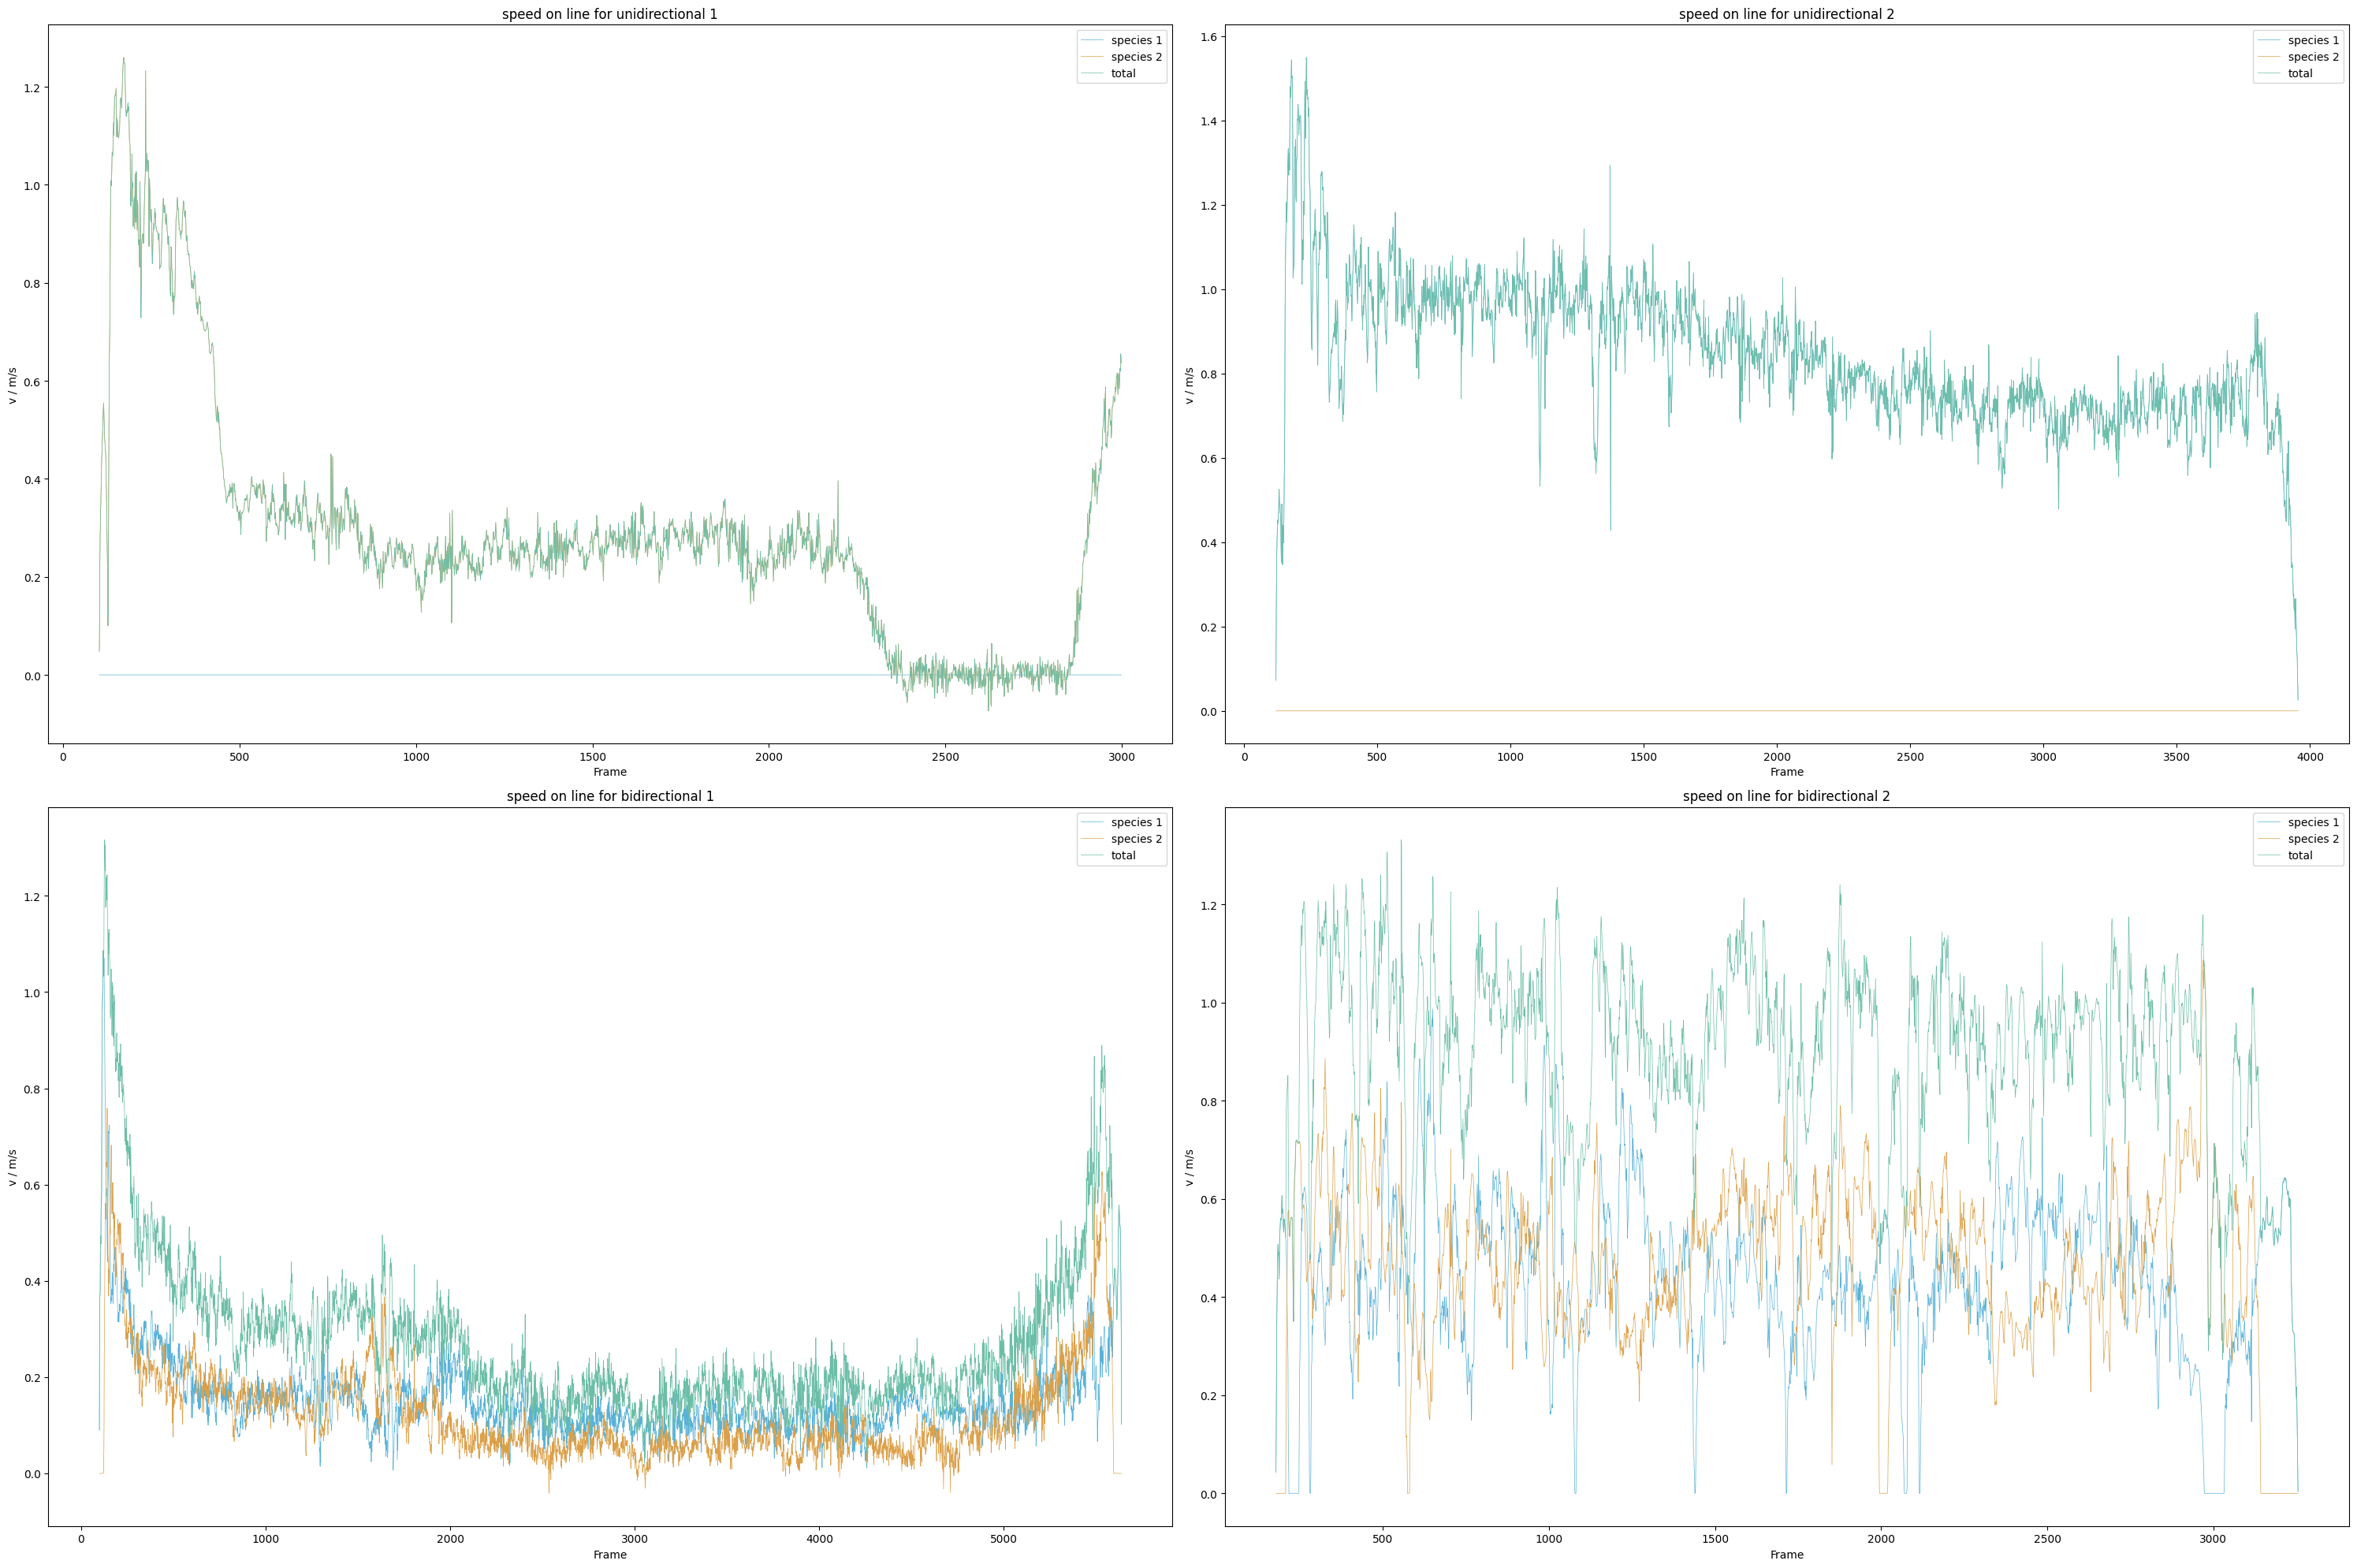

In [10]:
from pedpy.plotting.plotting import plot_speed_at_line
import matplotlib.pylab as plt

fig, axs = plt.subplots(2, int(len(speeds)/2), figsize=(30, 20))

for (name, speed_on_line), ax in zip(speeds.items(), axs.ravel()):
    
    ax = plot_speed_at_line(
            speed_at_line=speed_on_line,
            axes=ax,
            line_width=0.5,
            title="speed on line for "+name
        )

fig.tight_layout()
plt.show()
    

## Compute Density on the Line

The Density is computed from the density of a pedestrian Voronoi Cell proportional to their share on the Line.
The Density of a Species only considers the pedestrians representing the species.

$$ p^S = \sum_{i} \frac{1}{A_i(t)} *  \frac{w_i(t)}{w}  \text{ with } i \epsilon S $$
$A_i(t)$ is the amount of space the Voronoi Cell of pedestrian $i$ takes up
$\frac{w_i(t)}{w}$ is again the 

the total density combines the values of Species 1 and 2

$$ p = p^{\Roman{1}} + p^{\Roman{2}}$$ 

In [11]:
from pedpy.methods.density_calculator import compute_line_density

densities = {}
for name in trajectories:
    densities[name] = compute_line_density(
        individual_voronoi_polygons=individual_cutoffs[name],
        measurement_line=measurement_lines[name],
        species=species[name]) 

## Plot Densities on the Line

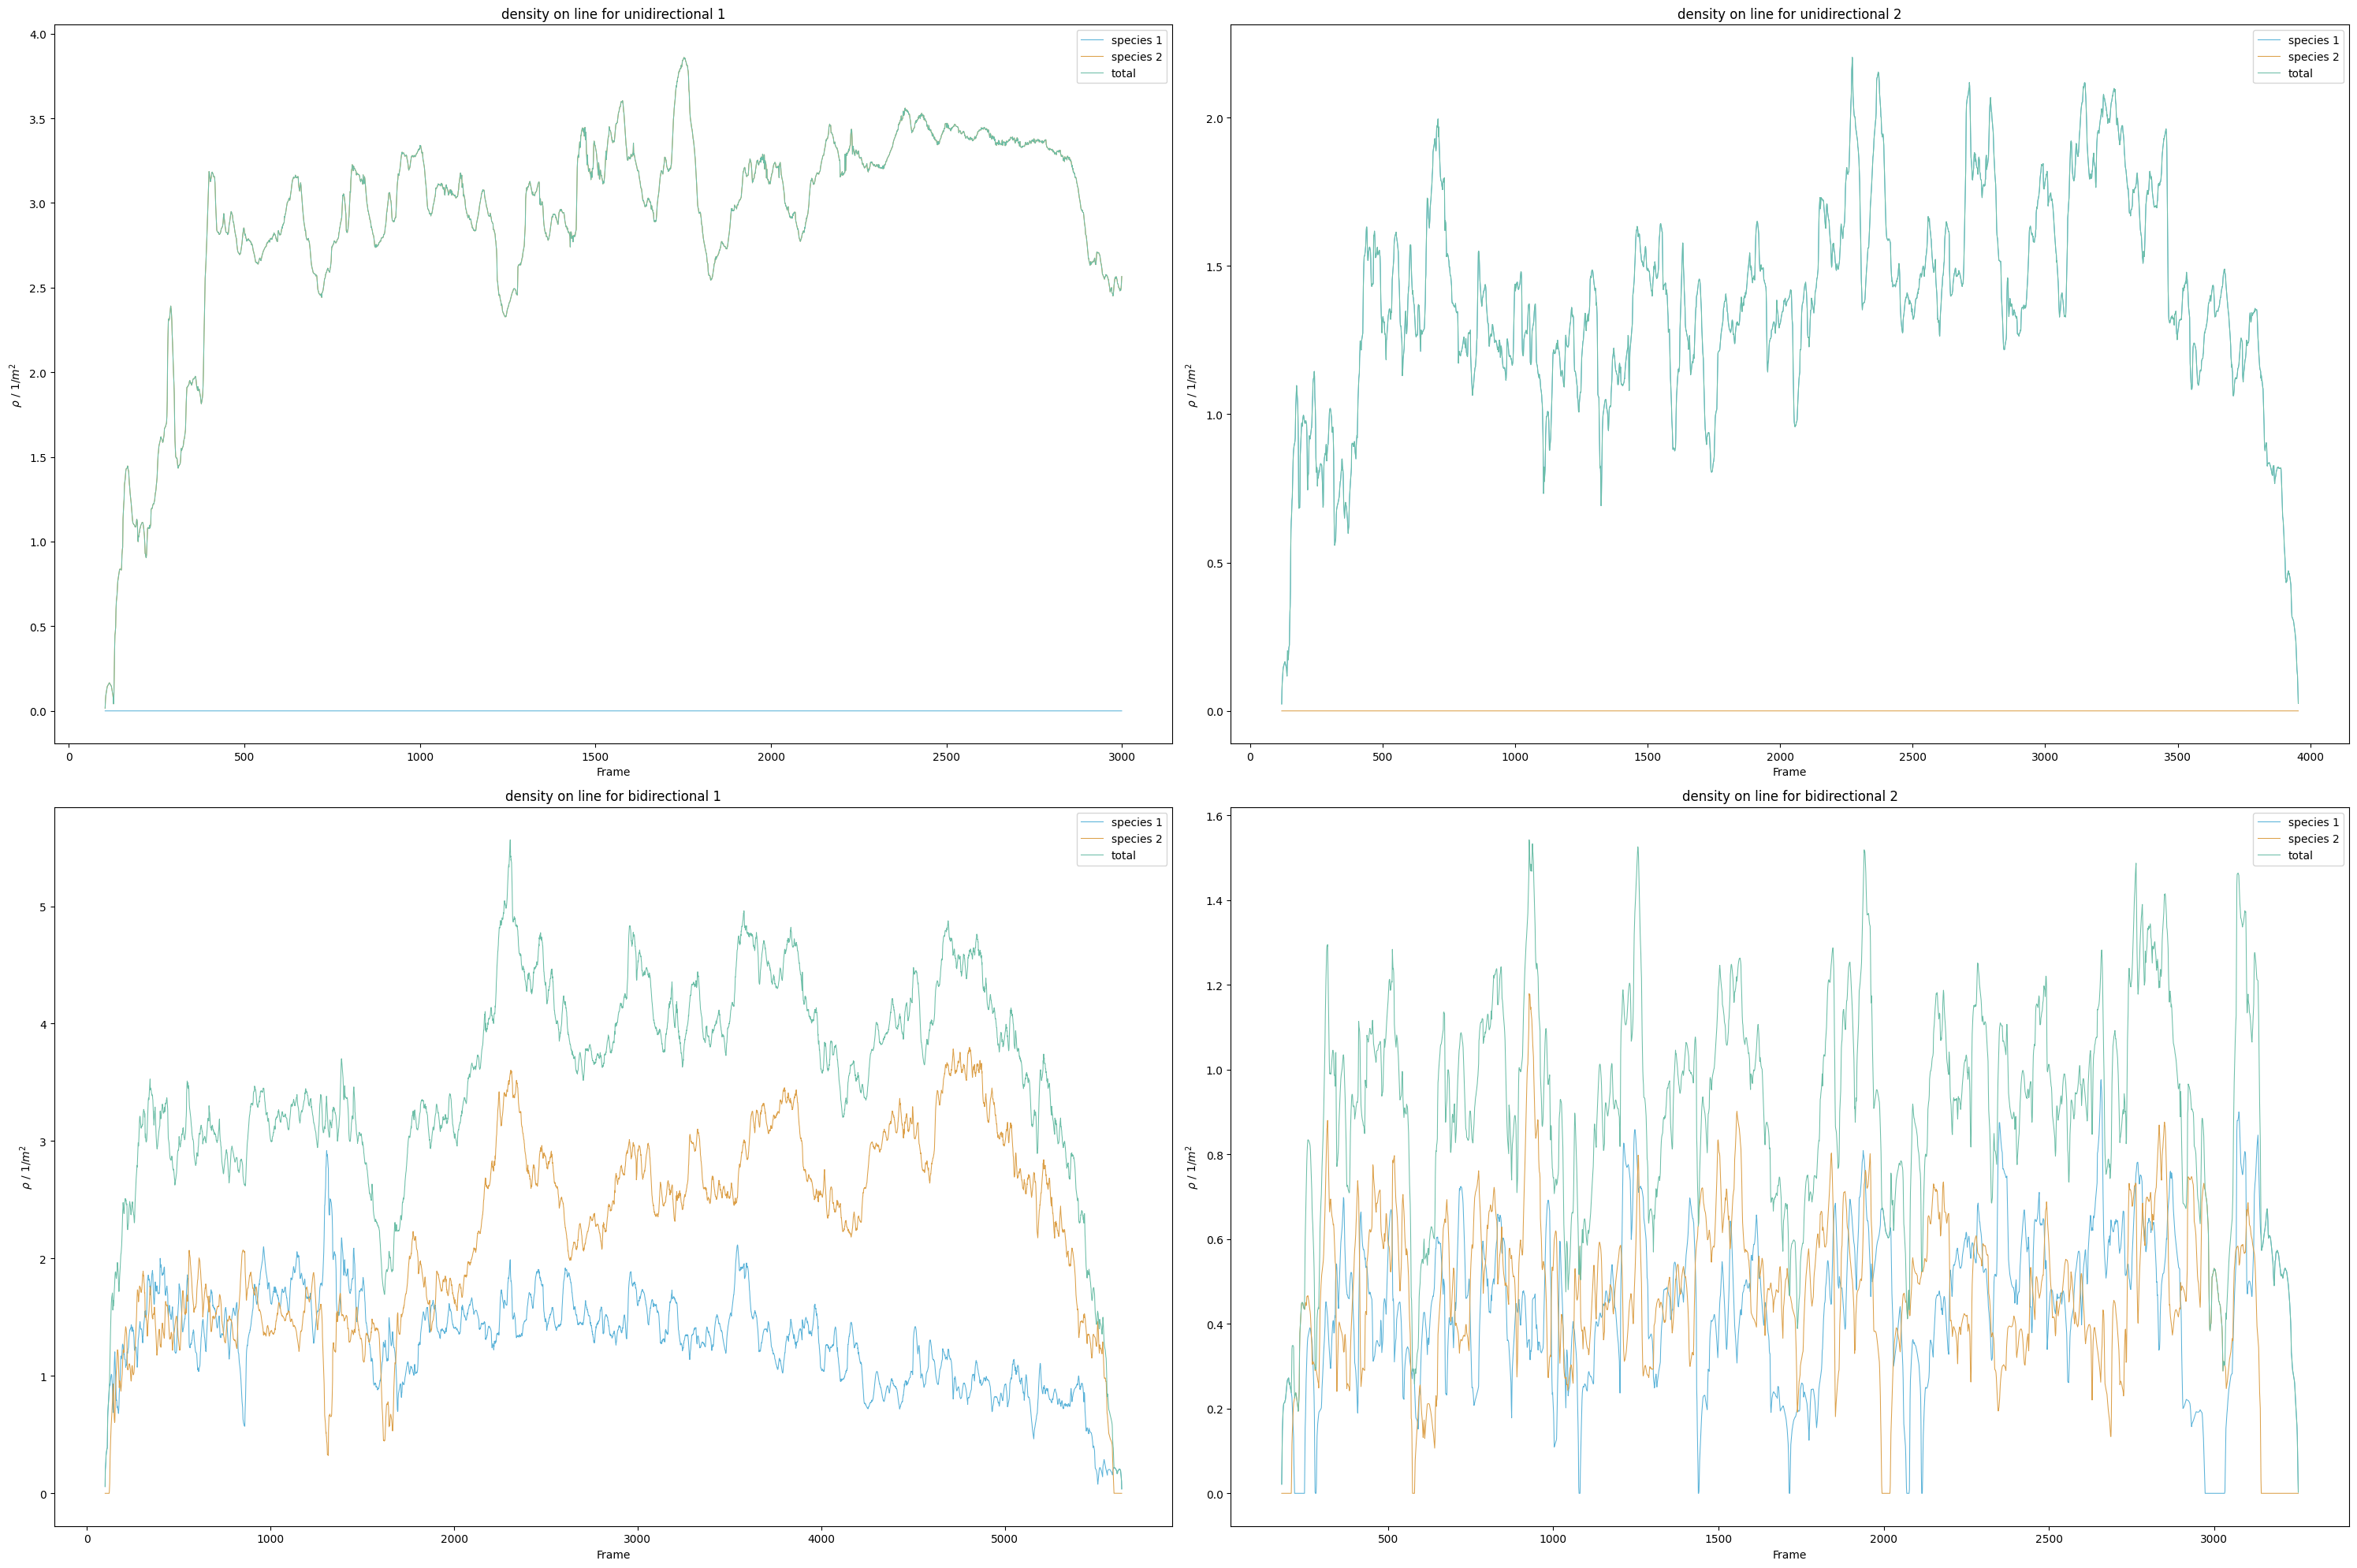

In [12]:
from pedpy.plotting.plotting import plot_density_at_line
import matplotlib.pylab as plt

fig, axs = plt.subplots(2, int(len(densities)/2), figsize=(30, 20))

for (name, density_on_line), ax in zip(densities.items(), axs.ravel()):
    
    ax = plot_density_at_line(
            density_at_line=density_on_line,
            axes=ax,
            line_width=0.75,
            title="density on line for "+name
        )

fig.tight_layout()
plt.show()

## Calculate Flow on Line

to compute the flow both the velocity orthogonal to the line and the density inside the Voronoi-Cell need to be considered.
Each species again only regards the pedestrians representing that species. To remedy negative velocities orthogonal to the line of species 2 the movement factor $m$ needs to be multiplied.

$$ j^S = \sum_{i} m * v_i(t) * n_{l0} * \frac{1}{A_i(t)} *  \frac{w_i(t)}{w}  \text{ with } i \epsilon S $$   

to recap all the symbols of the equation: 
$j$ is the flow, $S$ is the species for which the flow is calculated, $i$ is a pedestrian represented by $S$, $m$ is the movement factor calculated while determining the species, $v_i(t)$ is the velocity of pedestrian $i$, $n_{l0}$ is the orthogonal vector of line $l0$, $A_i(t)$ is the amount of space the Voronoi Cell of pedestrian $i$ takes up, $w_i(t)$ is the length of the line intersecting with the Voronoi Cell of pedestrian $i$, $w$ is the total length of the measurement line. 

In [13]:
from pedpy.methods.flow_calculator import compute_line_flow

flows = {}
for name in trajectories:
    flows[name] = compute_line_flow(
        individual_voronoi_polygons=individual_cutoffs[name],
        measurement_line=measurement_lines[name],
        species=species[name],
        individual_speed=individual_speeds[name]) 

## Plot Flow on Line

just like the speed and density it is now possible to plot the flow on the line

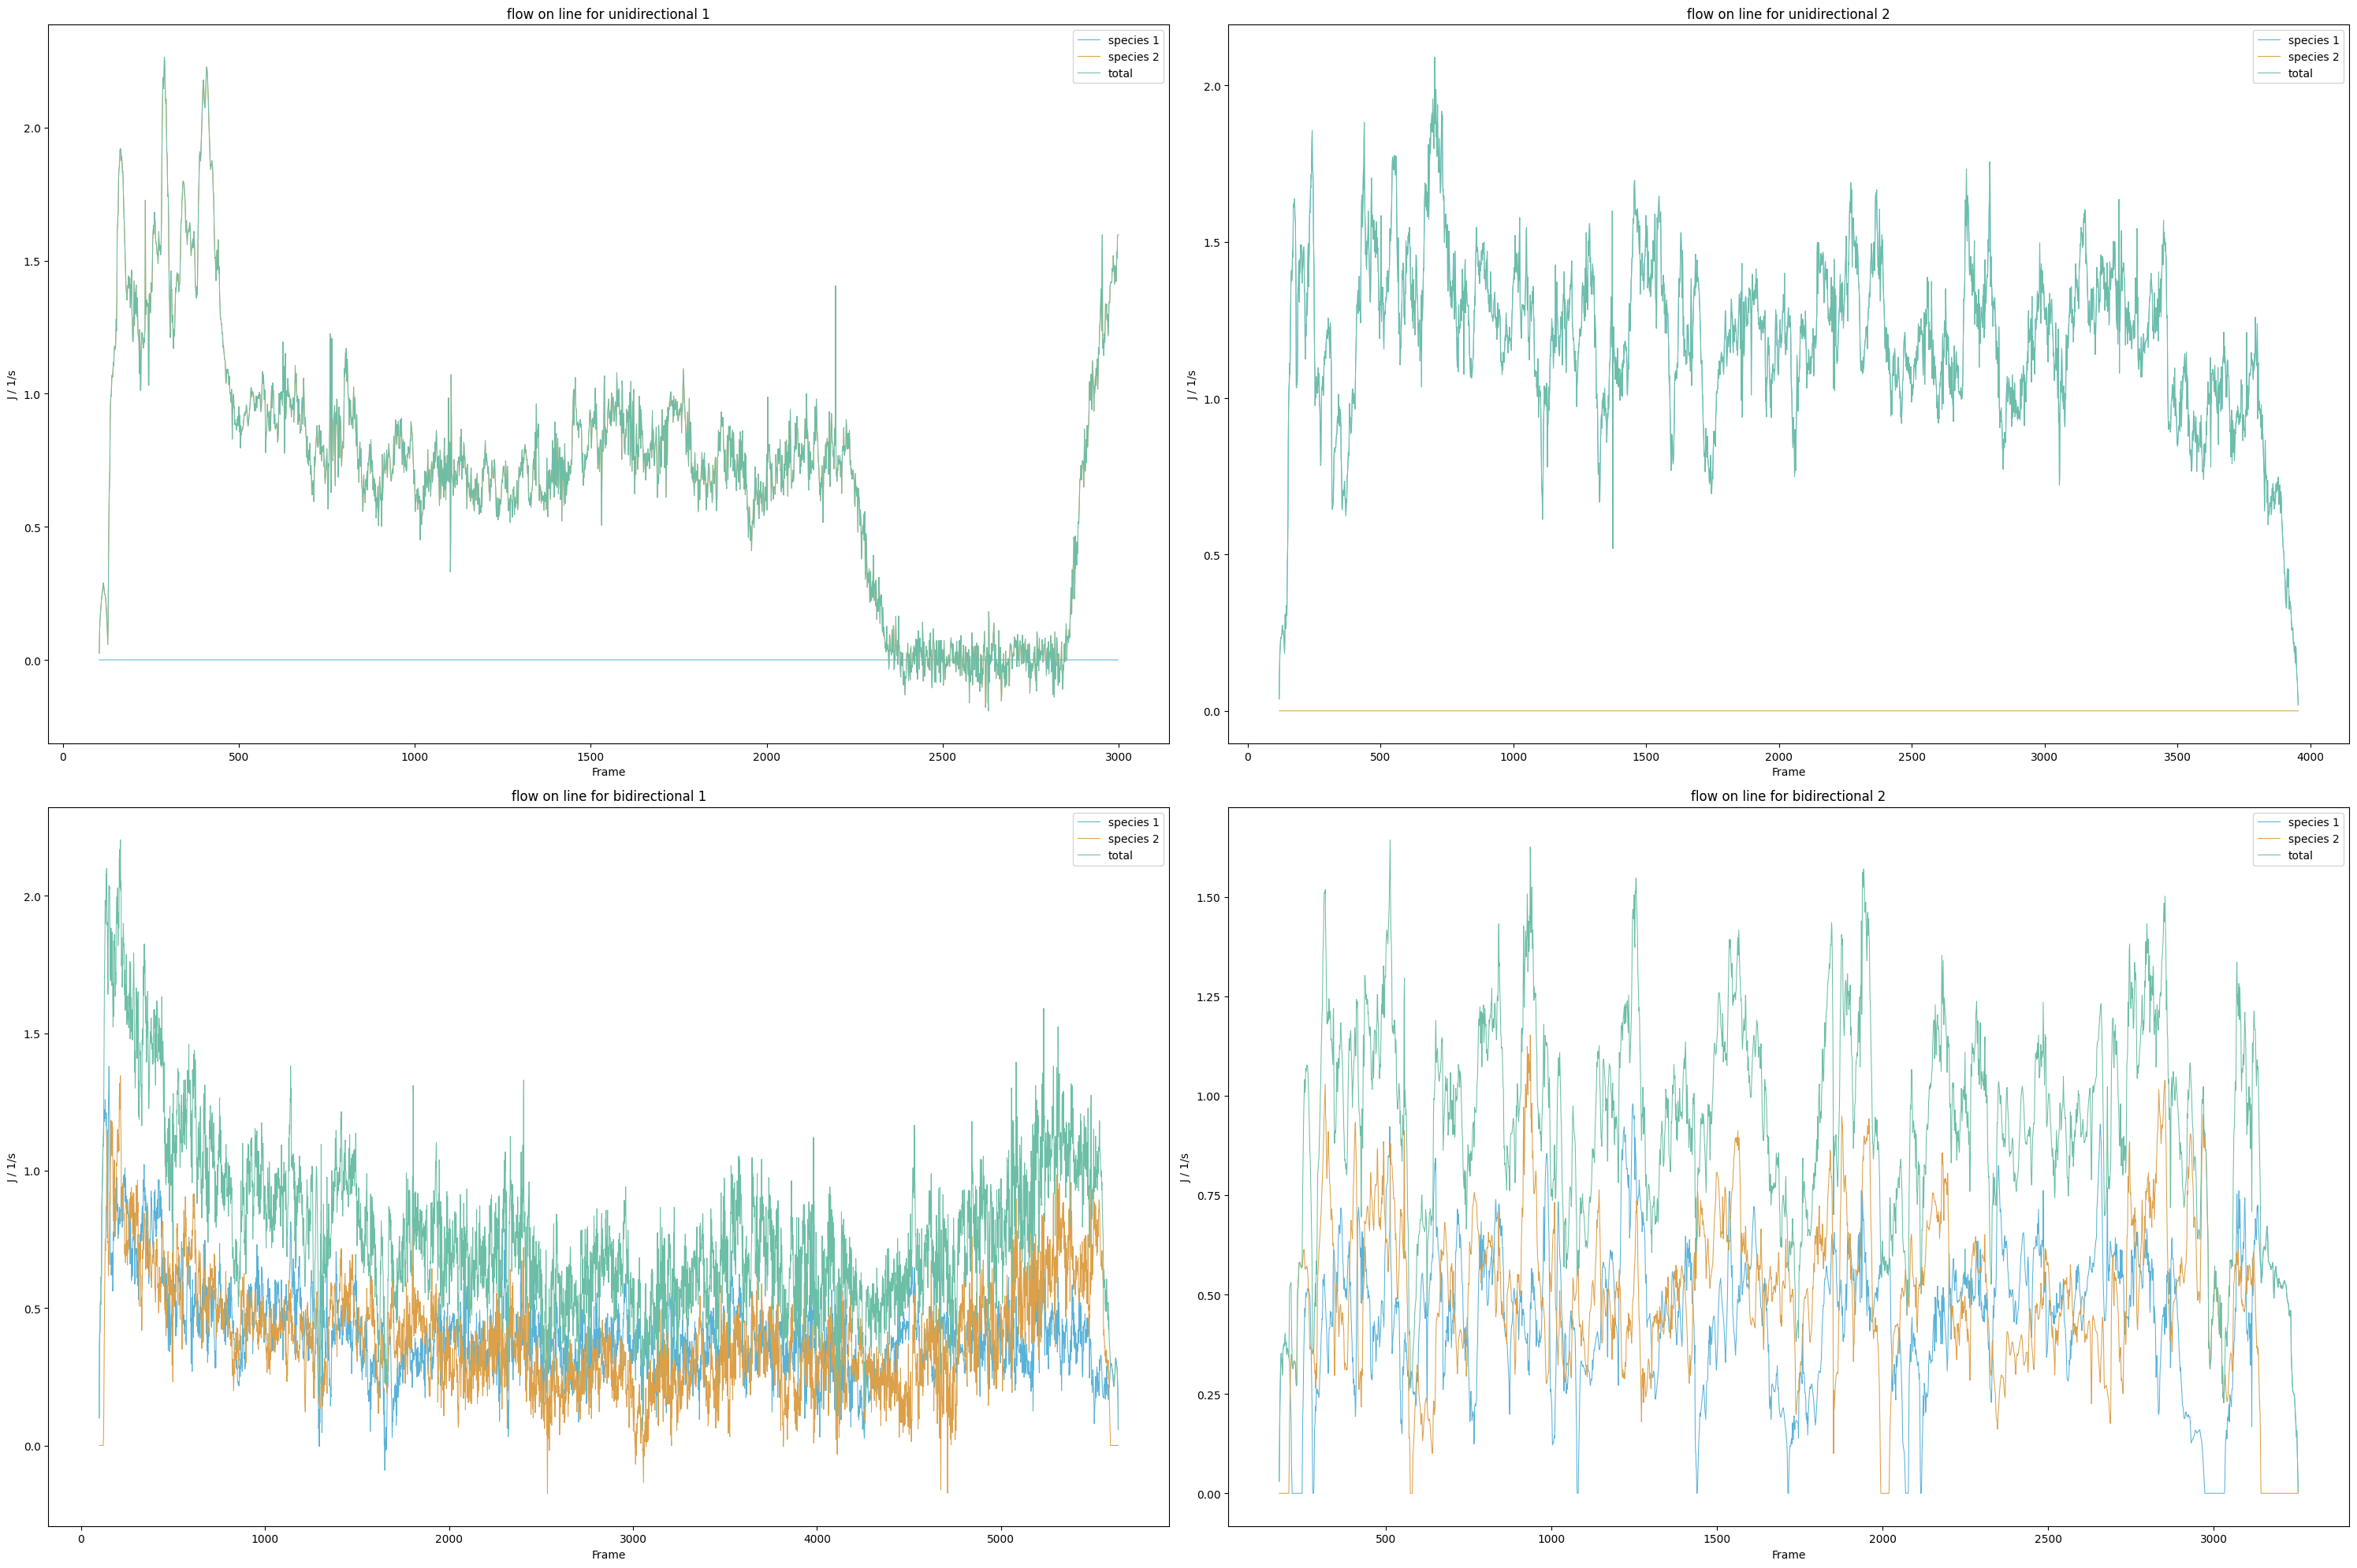

In [14]:
from pedpy.plotting.plotting import plot_flow_at_line
import matplotlib.pylab as plt

fig, axs = plt.subplots(2, int(len(flows)/2), figsize=(30, 20))

for (name, flow_on_line), ax in zip(flows.items(), axs.ravel()):
    
    ax = plot_flow_at_line(
            flow_at_line=flow_on_line,
            axes=ax,
            line_width=0.75,
            title="flow on line for "+name
        )

fig.tight_layout()
plt.show()